In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_excel('OnlineRetail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Dropping irrelevant columns
df = df.drop(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID'], axis=1)

In [4]:
df.isnull().sum()

Quantity     0
UnitPrice    0
Country      0
dtype: int64

In [5]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [6]:
# Converting target class into numerical data
df = pd.get_dummies(df, columns=['Country'])

print(df.head())

   Quantity  UnitPrice  Country_Australia  Country_Austria  Country_Bahrain  \
0         6       2.55              False            False            False   
1         6       3.39              False            False            False   
2         8       2.75              False            False            False   
3         6       3.39              False            False            False   
4         6       3.39              False            False            False   

   Country_Belgium  Country_Brazil  Country_Canada  Country_Channel Islands  \
0            False           False           False                    False   
1            False           False           False                    False   
2            False           False           False                    False   
3            False           False           False                    False   
4            False           False           False                    False   

   Country_Cyprus  ...  Country_RSA  Country_Saudi

In [7]:
from scipy import stats

# removing outliers based on the z-score method
z_threshold = 3

z_scores_quantity = stats.zscore(df['Quantity'])
z_scores_unitprice = stats.zscore(df['UnitPrice'])

outliers_quantity = (abs(z_scores_quantity) > z_threshold)
outliers_unitprice = (abs(z_scores_unitprice) > z_threshold)

df = df[~(outliers_quantity | outliers_unitprice)]
print(df)


        Quantity  UnitPrice  Country_Australia  Country_Austria  \
0              6       2.55              False            False   
1              6       3.39              False            False   
2              8       2.75              False            False   
3              6       3.39              False            False   
4              6       3.39              False            False   
...          ...        ...                ...              ...   
541904        12       0.85              False            False   
541905         6       2.10              False            False   
541906         4       4.15              False            False   
541907         4       4.15              False            False   
541908         3       4.95              False            False   

        Country_Bahrain  Country_Belgium  Country_Brazil  Country_Canada  \
0                 False            False           False           False   
1                 False            False   

In [8]:
# Normalize the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Quantity', 'UnitPrice']] = scaler.fit_transform(df[['Quantity', 'UnitPrice']])

In [9]:
df.head()

,Quantity,UnitPrice,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,-0.124133,-0.131084,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-0.124133,-0.016964,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-0.048079,-0.103912,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,-0.124133,-0.016964,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,-0.124133,-0.016964,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


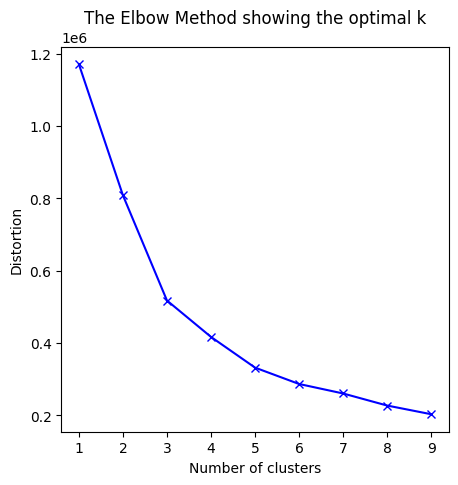

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Elbow Method

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,max_iter=50,n_init=10)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

# Plotting the distortions to find the 'elbow'
plt.figure(figsize=(5,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show() # k value of 3 is seen to be the optimal value after visualizing


## K-Means Clustering

In [27]:
# Perform k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=50,n_init=10)
kmeans.fit(df)

# Get cluster labels
cluster_labels = kmeans.labels_


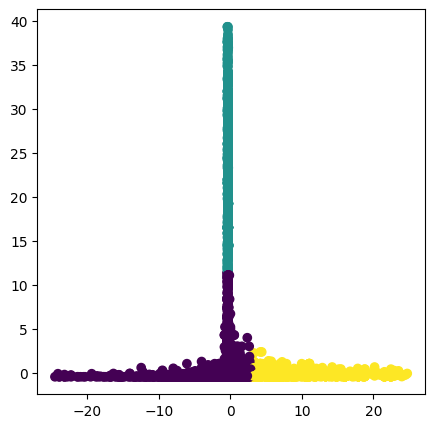

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 5))
plt.scatter(df['Quantity'], df['UnitPrice'], c=cluster_labels)

In [29]:
# calculating silhoutte score
from sklearn.metrics import silhouette_score

# Silhouette score for K-means
silhouette_avg_kmeans = silhouette_score(df, cluster_labels)
print(f"Silhouette Score (K-means): {silhouette_avg_kmeans:.2f}")

## Hierarichal Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df[:1000])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
cluster_labels =cluster.labels_

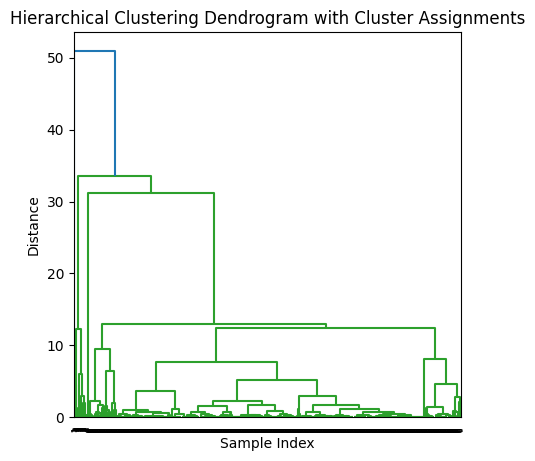

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Perform hierarchical clustering to get linkage matrix
Z = linkage(df[:1000], 'ward')

# Plot the dendrogram with cluster assignments
plt.figure(figsize=(5, 5))
dendrogram(Z, orientation='top', labels=cluster_labels)
plt.title('Hierarchical Clustering Dendrogram with Cluster Assignments')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
#calculating silhoutte score

# Silhouette score for Agglomerative Clustering
silhouette_avg_agg = silhouette_score(df[:1000], cluster.labels_)
print(f"Silhouette Score (Agglomerative): {silhouette_avg_agg:.2f}")


## Comparison

In [ ]:
# The silhouette score measures how well-separated the clusters are.
# Higher values indicate better-defined clusters.
# if the silhoutte score is closer to 1 then it indicates that the cluster are well defined
# In my case the k-mean algorithm is performing the best as it has higher silhoutte score than the
# Hierarchical clustering (Agglomerative clustering)